## Week5 Matplotlib Homework-Pymaceuticals


# summary 

* From the plot of "Tumor volume over 45 days", only Capomulin and Ramicane reduced tumor size. Capomulin inhibited tumor growth from 45mm3 to 36mm3, and Ramicane inhibited tumor growth from 45mm3 to 35mm3. Ketapril, Naftisol, and Stelasyn were slightly worse than Placebo.

* According to the plot of "Metastatic Spread During Treatment", Capomulin and Ramicane both showed an effort to facilitate tumor cell arrest and metastasis. In contrast, Ketapril got the worst result in this test.

* In the "Survival During Treatment", the mice were used Capomulin increasing in survival rate (21/25) compared to the mice used Placebo(11/25) after 45 days. Ramicane's performance was second best(20/25). 

* Capomulin and Ramicane were both outstanding from others in reducing tumor size, attenuating tumor metastasis, and increasing the survival rate. 


In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')



# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_df=pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_data_df=pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset

combined_data=pd.merge(clinical_trial_data_df,mouse_drug_data_df,on="Mouse ID")



combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

MeanofTumorVolume=combined_data.groupby(['Drug','Timepoint'])[['Tumor Volume (mm3)']].mean()

MeanofTumorVolume1=MeanofTumorVolume.reset_index()
MeanofTumorVolume1.head()




,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
StandErrorTumorVolume = combined_data.groupby(['Drug','Timepoint'])[['Tumor Volume (mm3)']].sem()
StandErrorTumorVolume = StandErrorTumorVolume.reset_index()
StandErrorTumorVolume.head()




,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames(Stand Error of Tumor Volumes)
StandErrorTumorVolume_reformat = StandErrorTumorVolume.pivot(index='Timepoint',columns='Drug', values='Tumor Volume (mm3)')

StandErrorTumorVolume_reformat.tail()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515
45,1.223977,0.902358,1.144427,1.453186,1.416363,1.351726,1.888586,1.226805,1.576556,1.003576


In [20]:
# Minor Data Munging to Re-Format the Data Frames(Mean of Tumor Volumes)
MeanofTumorVolume_reformat=MeanofTumorVolume1.pivot(index='Timepoint',columns='Drug', values='Tumor Volume (mm3)')

MeanofTumorVolume_reformat.head(10)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [6]:
DrugName=MeanofTumorVolume1['Drug'].unique()
DrugName

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

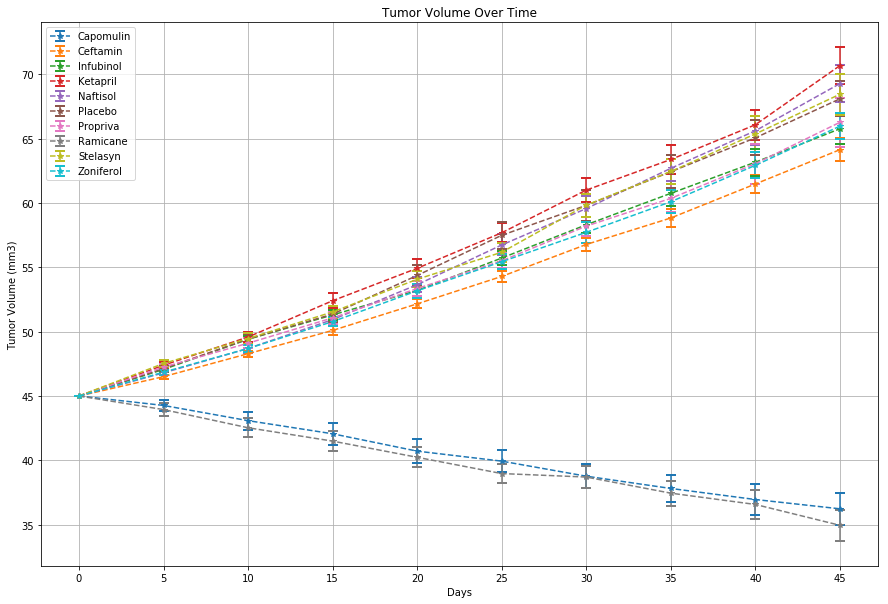

In [7]:
# Generate the Plot (with Error Bars)

DrugName=MeanofTumorVolume1['Drug'].unique()


plt.figure(figsize = (15,10))
plt.title('Tumor Volume Over Time')
plt.xlabel('Days') 
plt.ylabel('Tumor Volume (mm3)') 
plt.xticks(np.arange(0, 55 , 5)) 
plt.grid(True)
xvals = MeanofTumorVolume_reformat.index



for i in DrugName:
    plt.errorbar(xvals, 
                 MeanofTumorVolume_reformat[i], 
                 StandErrorTumorVolume_reformat[i], 
                 capthick = 2,
                 capsize = 5,
                 linestyle = '--',
                 marker =  "*") 
 
legend =plt.legend(loc="best")   

plt.show()




## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Mean_Met_Site_Data=combined_data.groupby(['Drug','Timepoint'])[['Metastatic Sites']].mean()

Mean_Met_Site_Data.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
SEMet_Site_Data=combined_data.groupby(['Drug','Timepoint'])[['Metastatic Sites']].sem()
SEMet_Site_Data.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames(Standard Error associated with Met.)
SEMet_Site_Data1=SEMet_Site_Data.reset_index()
SEMet_Site_Data_reform=SEMet_Site_Data1.pivot(index='Timepoint',columns='Drug', values='Metastatic Sites')
SEMet_Site_Data_reform


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [11]:
# Minor Data Munging to Re-Format the Data Frames(Mean associated with Met.)
Mean_Met_Site_Data1=Mean_Met_Site_Data.reset_index()
Mean_Met_Site_Data_reform1=Mean_Met_Site_Data1.pivot(index='Timepoint',columns='Drug', values='Metastatic Sites')
Mean_Met_Site_Data_reform1

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


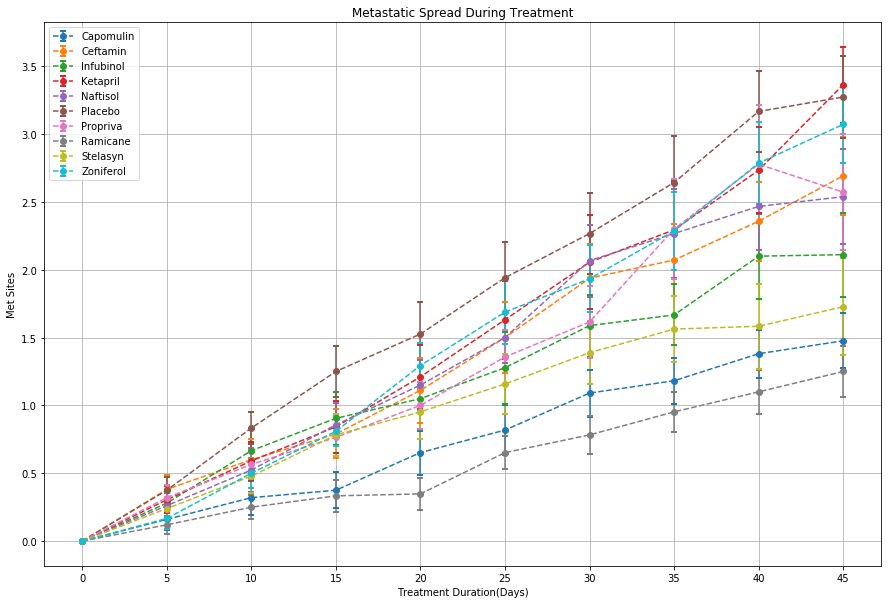

In [12]:
# Generate the Plot (with Error Bars)

DrugName=MeanofTumorVolume1['Drug'].unique()


plt.figure(figsize = (15,10))
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration(Days)') 
plt.ylabel('Met Sites') 
plt.xticks(np.arange(0, 55 , 5)) 
plt.grid(True)
xvals = Mean_Met_Site_Data_reform1.index



for i in DrugName:
    plt.errorbar(xvals, 
                 Mean_Met_Site_Data_reform1[i], 
                 SEMet_Site_Data_reform[i], 
                 linestyle = '--',
                 marker =  "o",
                 capthick = 2,
                 capsize = 3) 
 
legend1 =plt.legend(loc="best")   

plt.show()
plt.savefig('Metastatic Spread During Treatment')


## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
MouseCount_data=combined_data.groupby(['Drug','Timepoint'])[['Mouse ID']].count()
MouseCount_data1=MouseCount_data.rename(index=str, columns={"Mouse ID": "Mouse Count"})
MouseCount_data2=MouseCount_data1.reset_index()
MouseCount_data2.head()




,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
#change type of data
MouseCount_data2['Timepoint'] = MouseCount_data2['Timepoint'].astype(int)

In [15]:
# Minor Data Munging to Re-Format the Data Frames(the Count of Mice Grouped)
MouseCount_data1_reform = MouseCount_data2.pivot(index='Timepoint',columns='Drug', values='Mouse Count')
MouseCount_data1_reform

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


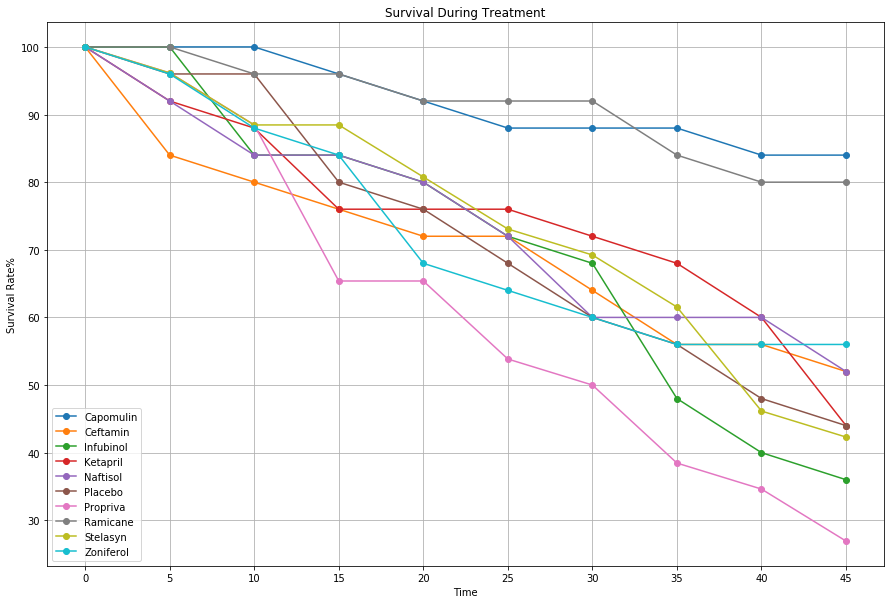

In [16]:
# Generate the Plot (Accounting for percentages)
DrugName=MeanofTumorVolume1['Drug'].unique()


plt.figure(figsize = (15,10))
plt.title('Survival During Treatment')
plt.xlabel('Time') 
plt.ylabel('Survival Rate%') 
plt.xticks(np.arange(0, 55 , 5)) 
plt.grid(True)
xvals= MouseCount_data1_reform.index
yvals= MouseCount_data1_reform[i]/MouseCount_data1_reform.loc[0,i] * 100

for i in DrugName:
    yvals= MouseCount_data1_reform[i]/MouseCount_data1_reform.loc[0,i] * 100
    plt.errorbar(xvals, 
                 yvals, 
                 linestyle = '-',
                 marker =  "o",
                 capthick = 2,
                 capsize = 3) 
    
legend1 =plt.legend(loc="best")   
# Show the Figure
plt.show()
plt.savefig('Survival During Treatment')

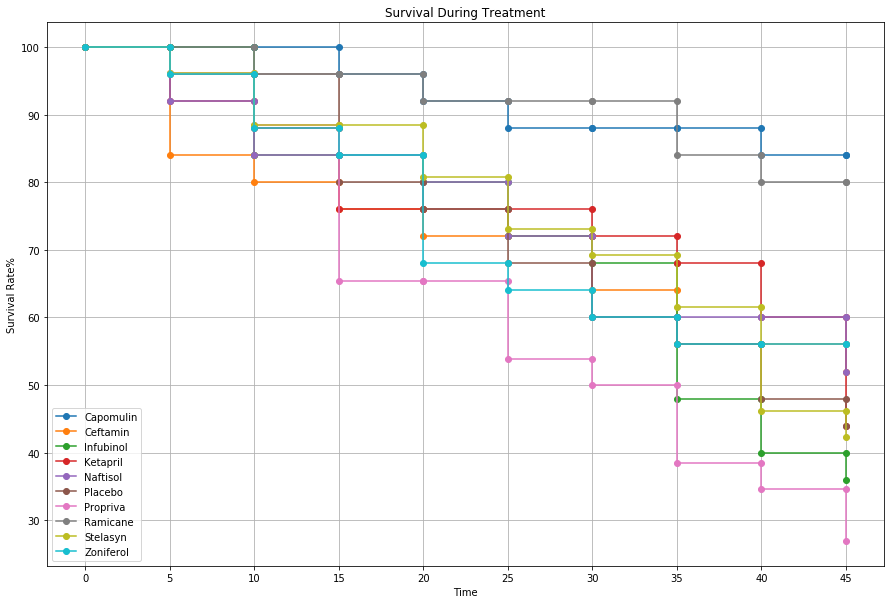

In [17]:
#Step plot (Accounting for percentages)

DrugName=MeanofTumorVolume1['Drug'].unique()


plt.figure(figsize = (15,10))
plt.title('Survival During Treatment')
plt.xlabel('Time') 
plt.ylabel('Survival Rate%') 
plt.xticks(np.arange(0, 55 , 5)) 
plt.grid(True)
xvals= MouseCount_data1_reform.index
yvals= MouseCount_data1_reform[i]/MouseCount_data1_reform.loc[0,i] * 100

for i in DrugName:
    yvals= MouseCount_data1_reform[i]/MouseCount_data1_reform.loc[0,i] * 100
    plt.step(xvals, 
             yvals, 
             linestyle = '-',
             marker =  "o",
             where = 'post') 


legend1 =plt.legend(loc="best")  

## Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug
percentChangesTummor=(MeanofTumorVolume_reformat.loc[45]-MeanofTumorVolume_reformat.loc[0])/MeanofTumorVolume_reformat.loc[0]*100

percentChangesTummor

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

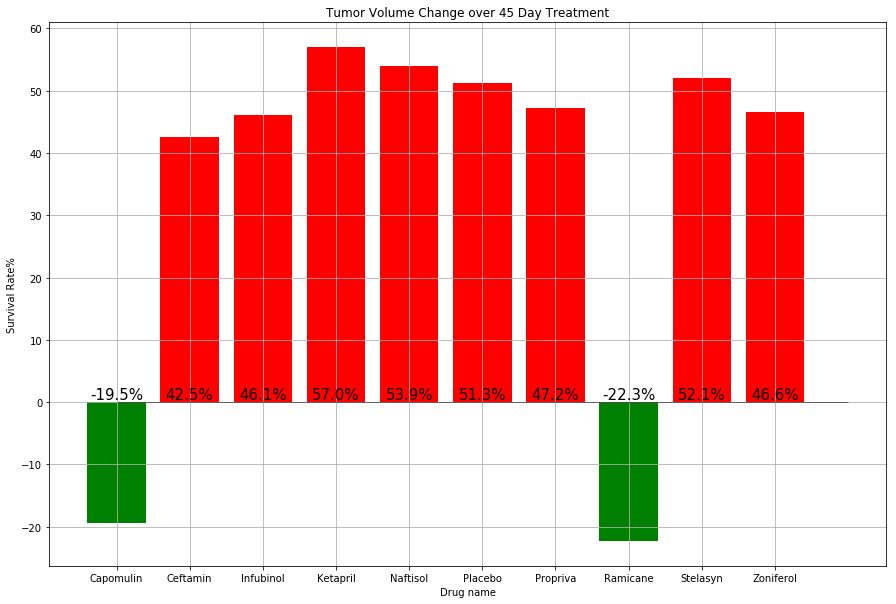

In [19]:
# Store all Relevant Percent Changes into a Tuple
plt.figure(figsize = (15,10))
plt.title('Tumor Volume Change over 45 Day Treatment')
plt.xlabel('Drug name') 
plt.ylabel('Survival Rate%') 
plt.grid(True)
x_axis = np.arange(len(DrugName))

plt.hlines(0,0,10, color = 'black', linewidth = 0.5)


yvals= percentChangesTummor

plt.bar(x_axis, 
        yvals, 
        color=['red' if percentChangesTummor[i] > 0 else 'green' for i in np.arange(len(DrugName))])

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations,DrugName)





count = 0

#loops through tumor change data and places the value in the correct position based on + or - values
for a in percentChangesTummor:

    plt.text(count, 0.5, str(round(a, 1)) + '%', fontsize=15, color = 'black', ha='center')
    count += 1

plt.show()
plt.savefig('Tumor Volume Change over 45 Day Treatment')